In [4]:
import os
import pandas as pd
import sys 
sys.path.append('/home/zhouzikai/nn_ext_dataflows/data_analysis')
from scripts import build_dataframe
import re



def parse_filename(filename):
    pattern = r"vl(\d+)_([0-9a-zA-Z]+)_stride_(\d+)_fs_(\d+)_([a-z]{2})((?:_[a-zA-Z]+_\d+)+)_hw_(\d+)_nf_(\d+)_(\w+)CPU__stats\.txt"
    match = re.match(pattern, filename)

    if match:
        num_bits = match.group(2)
        if num_bits == 'bin':
            num_bits = 1
        elif num_bits == '8bt':
            num_bits = 8
        else:
            raise Exception("number of bits not hardcoded")
            num_bits = int(num_bits)

        # Parsing and sorting auxiliary stationary and stats pairs
        aux_pairs_str = match.group(6)
        aux_pairs = re.findall(r"_([a-zA-Z]+)_(\d+)", aux_pairs_str)
        sorted_aux_pairs = sorted(aux_pairs, key=lambda x: x[0])

        aux_data = {}
        for i, (name, value) in enumerate(sorted_aux_pairs):
            if name not in aux_data:
                aux_data[f'aux_{name}'] = int(value)
            else:
                aux_data[f'aux_{name}_{i + 1}'] = int(value)

        return {
            'vector_length': int(match.group(1)),
            'num_bits': num_bits,
            'stride': int(match.group(3)),
            'filter_size': int(match.group(4)),
            'anchoring_stationary': match.group(5),
            'input_hw': int(match.group(7)),
            'num_filters': int(match.group(8)),
            'cpu_type': match.group(9),
            **aux_data
        }
    else:
        print(f"unmatched. filename: {filename}")
        return {}


def get_file_size(file_path):
    return os.path.getsize(file_path)

directory = '/home/zhouzikai/nn_ext_dataflows/gen_programs/noblock/log'


def get_data_size_df(directory):
    file_data = []
    for filename in os.listdir(directory):
        f = os.path.join(directory, filename)
        parsed_info = parse_filename(filename)
        # if (get_file_size(f)) == 0:
        #     # print("found one empty")
        file_data.append({'file_path': f, 'size': get_file_size(f), **parsed_info})
    df = pd.DataFrame(file_data).set_index('file_path')
    return df

def append_dataframe(df1, df2, join_keyword='filename'):
    '''
    add the 'size' column from df1 to df2, assuming their indices are the same (file path)
    '''
    #merged_df = df2.merge(df1[[join_keyword, 'size']], on=join_keyword, how='left')
    merged_df = df2.join(df1)

    return merged_df

df = get_data_size_df(directory)
empty_files_df = df[df['size'] == 0]
print("empty stats:", empty_files_df)
print("all df:", df)
file_list=[]
for filename in os.listdir(directory):
   f = os.path.join(directory, filename)
   file_list.append(f)
# testing appending dataframe
# first off calling Zack's df function 
df_files = build_dataframe(file_list)
# print(df_files)
merged = append_dataframe(df,df_files)
# print(merged)


empty stats: Empty DataFrame
Columns: [size, vector_length, num_bits, stride, filter_size, anchoring_stationary, input_hw, num_filters, cpu_type, aux_os, aux_ws, aux_is]
Index: []
all df:                                                       size  vector_length   
file_path                                                                   
/home/zhouzikai/nn_ext_dataflows/gen_programs/n...  167455            512  \
/home/zhouzikai/nn_ext_dataflows/gen_programs/n...  168452            256   
/home/zhouzikai/nn_ext_dataflows/gen_programs/n...  323407            256   
/home/zhouzikai/nn_ext_dataflows/gen_programs/n...  167720            512   
/home/zhouzikai/nn_ext_dataflows/gen_programs/n...  334684            128   
...                                                    ...            ...   
/home/zhouzikai/nn_ext_dataflows/gen_programs/n...  167870            256   
/home/zhouzikai/nn_ext_dataflows/gen_programs/n...  162794            128   
/home/zhouzikai/nn_ext_dataflows/gen_progr

In [7]:
merged.head()

,simSeconds,simTicks,finalTick,simFreq,hostSeconds,hostTickRate,hostMemory,simInsts,simOps,hostInstRate,...,num_bits,stride,filter_size,anchoring_stationary,input_hw,num_filters,cpu_type,aux_os,aux_ws,aux_is
/home/zhouzikai/nn_ext_dataflows/gen_programs/noblock/log/vl512_8bt_stride_1_fs_3_is_ws_4_os_1_hw_56_nf_1_O3CPU__stats.txt,0.000182,1.817520e+08,1.180192e+09,1.000000e+12,1.07,169313207.0,681156.0,1971314.0,2263439.0,1836201.0,...,8,1,3,is,56,1,O3,1.0,4.0,NaN
/home/zhouzikai/nn_ext_dataflows/gen_programs/noblock/log/vl256_bin_stride_1_fs_4_is_ws_13_os_0_hw_112_nf_4_O3CPU__stats.txt,0.002018,2.017788e+09,3.016201e+09,1.000000e+12,13.04,154724715.0,681156.0,6168766.0,6473879.0,473019.0,...,1,1,4,is,112,4,O3,0.0,13.0,NaN
/home/zhouzikai/nn_ext_dataflows/gen_programs/noblock/log/vl256_bin_stride_1_fs_3_ws_os_13_is_0_hw_56_nf_4_O3CPU__stats.txt,0.000457,4.571280e+08,1.452594e+09,1.000000e+12,6.93,65974129.0,680136.0,3376010.0,3927066.0,487227.0,...,1,1,3,ws,56,4,O3,13.0,NaN,0.0
/home/zhouzikai/nn_ext_dataflows/gen_programs/noblock/log/vl512_bin_stride_1_fs_3_is_ws_4_os_1_hw_56_nf_1_O3CPU__stats.txt,0.000191,1.905140e+08,1.188813e+09,1.000000e+12,1.26,150670947.0,681156.0,2062488.0,2347498.0,1630991.0,...,1,1,3,is,56,1,O3,1.0,4.0,NaN
/home/zhouzikai/nn_ext_dataflows/gen_programs/noblock/log/vl128_8bt_stride_1_fs_3_ws_os_29_is_0_hw_112_nf_1_O3CPU__stats.txt,0.000715,7.154330e+08,1.711571e+09,1.000000e+12,4.82,148308544.0,680136.0,2544882.0,2901335.0,527538.0,...,8,1,3,ws,112,1,O3,29.0,NaN,0.0


In [10]:
filtered_merged = merged[["simSeconds","vector_length","num_bits","stride","filter_size","anchoring_stationary","input_hw","num_filters","aux_os","aux_ws","aux_is"]]

In [11]:
filtered_merged.head()

,simSeconds,vector_length,num_bits,stride,filter_size,anchoring_stationary,input_hw,num_filters,aux_os,aux_ws,aux_is
/home/zhouzikai/nn_ext_dataflows/gen_programs/noblock/log/vl512_8bt_stride_1_fs_3_is_ws_4_os_1_hw_56_nf_1_O3CPU__stats.txt,0.000182,512,8,1,3,is,56,1,1.0,4.0,NaN
/home/zhouzikai/nn_ext_dataflows/gen_programs/noblock/log/vl256_bin_stride_1_fs_4_is_ws_13_os_0_hw_112_nf_4_O3CPU__stats.txt,0.002018,256,1,1,4,is,112,4,0.0,13.0,NaN
/home/zhouzikai/nn_ext_dataflows/gen_programs/noblock/log/vl256_bin_stride_1_fs_3_ws_os_13_is_0_hw_56_nf_4_O3CPU__stats.txt,0.000457,256,1,1,3,ws,56,4,13.0,NaN,0.0
/home/zhouzikai/nn_ext_dataflows/gen_programs/noblock/log/vl512_bin_stride_1_fs_3_is_ws_4_os_1_hw_56_nf_1_O3CPU__stats.txt,0.000191,512,1,1,3,is,56,1,1.0,4.0,NaN
/home/zhouzikai/nn_ext_dataflows/gen_programs/noblock/log/vl128_8bt_stride_1_fs_3_ws_os_29_is_0_hw_112_nf_1_O3CPU__stats.txt,0.000715,128,8,1,3,ws,112,1,29.0,NaN,0.0


In [12]:
filtered_merged = filtered_merged.reset_index()

In [13]:
filtered_merged

,index,simSeconds,vector_length,num_bits,stride,filter_size,anchoring_stationary,input_hw,num_filters,aux_os,aux_ws,aux_is
0,/home/zhouzikai/nn_ext_dataflows/gen_programs/...,0.000182,512,8,1,3,is,56,1,1.0,4.0,NaN
1,/home/zhouzikai/nn_ext_dataflows/gen_programs/...,0.002018,256,1,1,4,is,112,4,0.0,13.0,NaN
2,/home/zhouzikai/nn_ext_dataflows/gen_programs/...,0.000457,256,1,1,3,ws,56,4,13.0,NaN,0.0
3,/home/zhouzikai/nn_ext_dataflows/gen_programs/...,0.000191,512,1,1,3,is,56,1,1.0,4.0,NaN
4,/home/zhouzikai/nn_ext_dataflows/gen_programs/...,0.000715,128,8,1,3,ws,112,1,29.0,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
379,/home/zhouzikai/nn_ext_dataflows/gen_programs/...,0.002421,256,8,1,3,is,112,4,3.0,9.0,NaN
380,/home/zhouzikai/nn_ext_dataflows/gen_programs/...,0.000119,128,8,1,4,os,56,4,NaN,16.0,12.0
381,/home/zhouzikai/nn_ext_dataflows/gen_programs/...,0.001076,512,8,1,5,is,112,1,5.0,0.0,NaN
382,/home/zhouzikai/nn_ext_dataflows/gen_programs/...,0.000308,128,1,1,3,is,112,1,6.0,9.0,NaN


In [22]:
filtered_merged.drop(columns=['index'])

,simSeconds,vector_length,num_bits,stride,filter_size,anchoring_stationary,input_hw,num_filters,cpu_type,aux_os,aux_ws,aux_is
0,0.006253,512,1,1,5,is,112,4,O3,4.0,1.0,NaN
1,0.001467,128,1,1,5,is,112,4,O3,9.0,20.0,NaN
2,0.001376,128,8,1,5,is,112,4,O3,17.0,12.0,NaN
3,0.000457,256,1,1,3,ws,56,4,O3,13.0,NaN,0.0
4,0.000455,256,8,1,5,os,56,4,O3,NaN,7.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...
747,0.000873,256,1,1,5,os,112,1,O3,NaN,12.0,1.0
748,0.000181,128,8,1,5,os,56,4,O3,NaN,10.0,19.0
749,0.000863,256,8,1,4,ws,112,1,O3,0.0,NaN,13.0
750,0.000459,256,8,1,4,os,112,1,O3,NaN,7.0,6.0


In [14]:
is_anchored = filtered_merged[filtered_merged["anchoring_stationary"]=="is"]
os_anchored = filtered_merged[filtered_merged["anchoring_stationary"]=="os"]
ws_anchored = filtered_merged[filtered_merged["anchoring_stationary"]=="ws"]

In [15]:
is_anchored

,index,simSeconds,vector_length,num_bits,stride,filter_size,anchoring_stationary,input_hw,num_filters,aux_os,aux_ws,aux_is
0,/home/zhouzikai/nn_ext_dataflows/gen_programs/...,0.000182,512,8,1,3,is,56,1,1.0,4.0,NaN
1,/home/zhouzikai/nn_ext_dataflows/gen_programs/...,0.002018,256,1,1,4,is,112,4,0.0,13.0,NaN
3,/home/zhouzikai/nn_ext_dataflows/gen_programs/...,0.000191,512,1,1,3,is,56,1,1.0,4.0,NaN
6,/home/zhouzikai/nn_ext_dataflows/gen_programs/...,0.000172,128,1,1,4,is,56,4,12.0,16.0,NaN
10,/home/zhouzikai/nn_ext_dataflows/gen_programs/...,0.000181,512,8,1,3,is,56,1,0.0,5.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
377,/home/zhouzikai/nn_ext_dataflows/gen_programs/...,0.001869,128,8,1,5,is,112,4,4.0,25.0,NaN
378,/home/zhouzikai/nn_ext_dataflows/gen_programs/...,0.002878,512,1,1,3,is,112,4,0.0,5.0,NaN
379,/home/zhouzikai/nn_ext_dataflows/gen_programs/...,0.002421,256,8,1,3,is,112,4,3.0,9.0,NaN
381,/home/zhouzikai/nn_ext_dataflows/gen_programs/...,0.001076,512,8,1,5,is,112,1,5.0,0.0,NaN


In [24]:
is_anchored["prefer_ws"] = (is_anchored["aux_ws"]==is_anchored["num_filters"]*is_anchored["num_filters"]) | (is_anchored["aux_os"] == 0)
os_anchored["prefer_ws"] = (os_anchored["aux_ws"]==os_anchored["num_filters"]*os_anchored["num_filters"]) | (os_anchored["aux_is"] == 0)
ws_anchored["prefer_is"] = ws_anchored["aux_os"] == 0

/tmp/ipykernel_40169/3302285772.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  is_anchored["prefer_ws"] = (is_anchored["aux_ws"]==is_anchored["num_filters"]*is_anchored["num_filters"]) | (is_anchored["aux_os"] == 0)
/tmp/ipykernel_40169/3302285772.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  os_anchored["prefer_ws"] = (os_anchored["aux_ws"]==os_anchored["num_filters"]*os_anchored["num_filters"]) | (os_anchored["aux_is"] == 0)
/tmp/ipykernel_40169/3302285772.py:3: SettingWithCopyWarning: 
A value

In [21]:
is_anchored

,index,simSeconds,vector_length,num_bits,stride,filter_size,anchoring_stationary,input_hw,num_filters,aux_os,aux_ws,aux_is,prefer_ws
0,/home/zhouzikai/nn_ext_dataflows/gen_programs/...,0.000182,512,8,1,3,is,56,1,1.0,4.0,NaN,False
1,/home/zhouzikai/nn_ext_dataflows/gen_programs/...,0.002018,256,1,1,4,is,112,4,0.0,13.0,NaN,True
3,/home/zhouzikai/nn_ext_dataflows/gen_programs/...,0.000191,512,1,1,3,is,56,1,1.0,4.0,NaN,False
6,/home/zhouzikai/nn_ext_dataflows/gen_programs/...,0.000172,128,1,1,4,is,56,4,12.0,16.0,NaN,True
10,/home/zhouzikai/nn_ext_dataflows/gen_programs/...,0.000181,512,8,1,3,is,56,1,0.0,5.0,NaN,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
377,/home/zhouzikai/nn_ext_dataflows/gen_programs/...,0.001869,128,8,1,5,is,112,4,4.0,25.0,NaN,False
378,/home/zhouzikai/nn_ext_dataflows/gen_programs/...,0.002878,512,1,1,3,is,112,4,0.0,5.0,NaN,True
379,/home/zhouzikai/nn_ext_dataflows/gen_programs/...,0.002421,256,8,1,3,is,112,4,3.0,9.0,NaN,False
381,/home/zhouzikai/nn_ext_dataflows/gen_programs/...,0.001076,512,8,1,5,is,112,1,5.0,0.0,NaN,False


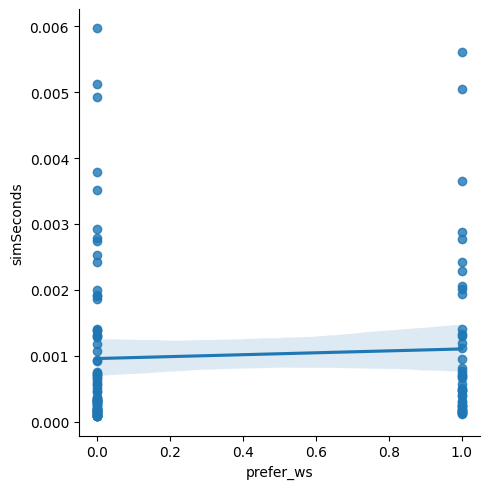

In [23]:
import seaborn as sns
sns.lmplot(x='prefer_ws',y='simSeconds',data=is_anchored,fit_reg=True)

In [29]:
def calculate_difference(group):
    true_value = group.loc[group['prefer_ws'] == True, 'simSeconds'].sum()
    false_value = group.loc[group['prefer_ws'] == False, 'simSeconds'].sum()
    return true_value - false_value

is_diff = is_anchored.groupby(['vector_length', 'num_bits','stride','filter_size','input_hw','num_filters']).apply(calculate_difference).reset_index(name='Difference')

<Axes: >

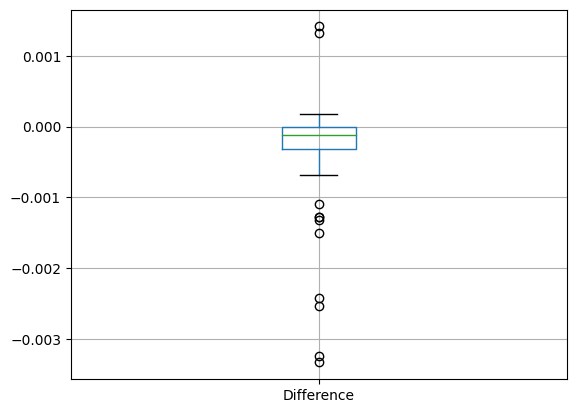

In [40]:
is_diff.boxplot(column=['Difference'])

In [37]:
os_diff = os_anchored.groupby(['vector_length', 'num_bits','stride','filter_size','input_hw','num_filters']).apply(calculate_difference).reset_index(name='Difference')

<Axes: >

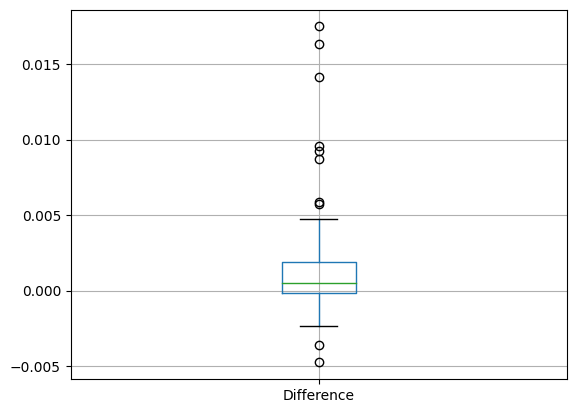

In [41]:
os_diff.boxplot(column=['Difference'])

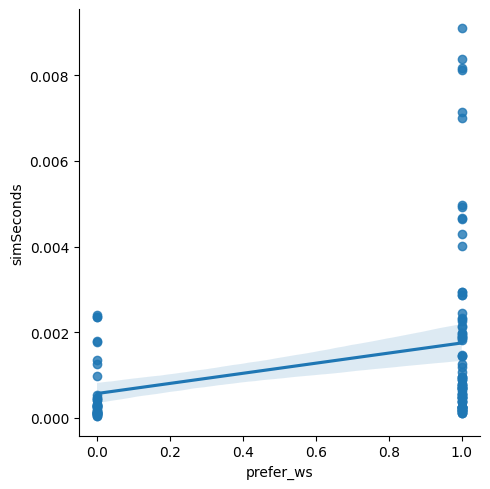

In [25]:
sns.lmplot(x='prefer_ws',y='simSeconds',data=os_anchored,fit_reg=True)

In [42]:
def calculate_ws_difference(group):
    true_value = group.loc[group['prefer_is'] == True, 'simSeconds'].sum()
    false_value = group.loc[group['prefer_is'] == False, 'simSeconds'].sum()
    return true_value - false_value
    
ws_diff = ws_anchored.groupby(['vector_length', 'num_bits','stride','filter_size','input_hw','num_filters']).apply(calculate_ws_difference).reset_index(name='Difference')

<Axes: >

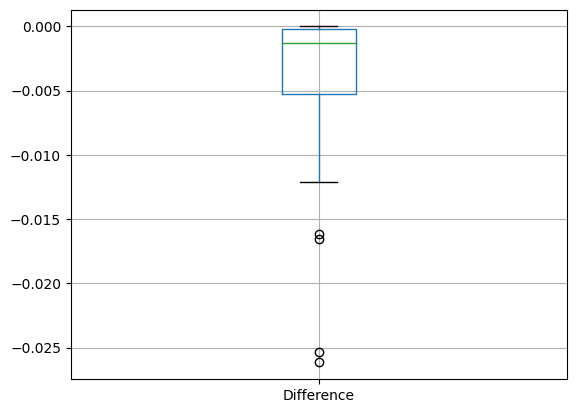

In [43]:
ws_diff.boxplot(column=['Difference'])

In [85]:
os_256_4

,index,simSeconds,vector_length,num_bits,stride,filter_size,anchoring_stationary,input_hw,num_filters,cpu_type,aux_os,aux_ws,aux_is
114,/home/zhouzikai/nn_ext_dataflows/gen_programs/...,0.001962,256,8,1,4,os,112,4,O3,NaN,8.0,5.0
220,/home/zhouzikai/nn_ext_dataflows/gen_programs/...,0.000547,256,1,1,4,os,112,1,O3,NaN,8.0,5.0
228,/home/zhouzikai/nn_ext_dataflows/gen_programs/...,0.000362,256,1,1,4,os,56,4,O3,NaN,8.0,5.0
281,/home/zhouzikai/nn_ext_dataflows/gen_programs/...,0.001992,256,8,1,4,os,112,4,O3,NaN,7.0,6.0
340,/home/zhouzikai/nn_ext_dataflows/gen_programs/...,0.000366,256,1,1,4,os,56,4,O3,NaN,7.0,6.0
367,/home/zhouzikai/nn_ext_dataflows/gen_programs/...,0.000122,256,8,1,4,os,56,1,O3,NaN,8.0,5.0
459,/home/zhouzikai/nn_ext_dataflows/gen_programs/...,0.000254,256,8,1,4,os,56,4,O3,NaN,8.0,5.0
490,/home/zhouzikai/nn_ext_dataflows/gen_programs/...,0.000450,256,8,1,4,os,112,1,O3,NaN,8.0,5.0
517,/home/zhouzikai/nn_ext_dataflows/gen_programs/...,0.000125,256,8,1,4,os,56,1,O3,NaN,7.0,6.0
522,/home/zhouzikai/nn_ext_dataflows/gen_programs/...,0.000147,256,1,1,4,os,56,1,O3,NaN,8.0,5.0


In [58]:
import seaborn as sns

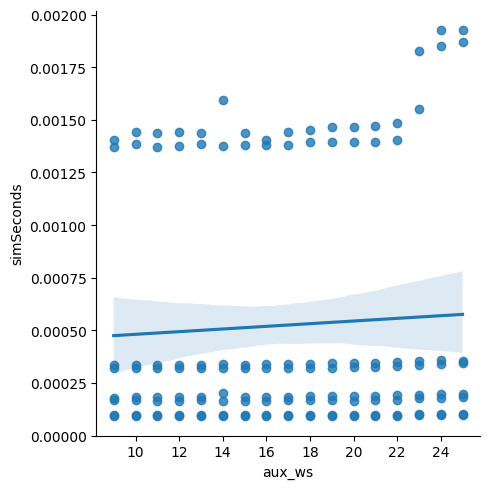

In [62]:
sns.lmplot(x='aux_ws',y='simSeconds',data=is_128_5,fit_reg=True) 

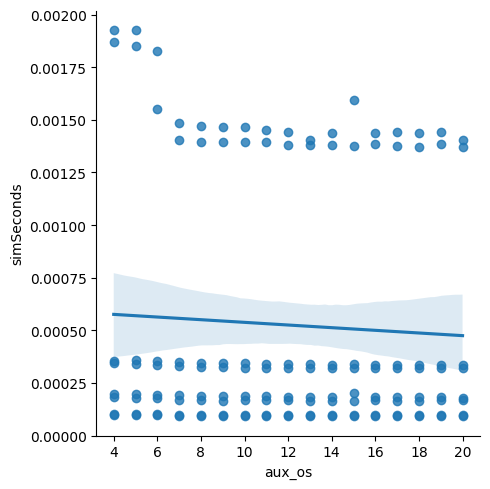

In [63]:
sns.lmplot(x='aux_os',y='simSeconds',data=is_128_5,fit_reg=True)

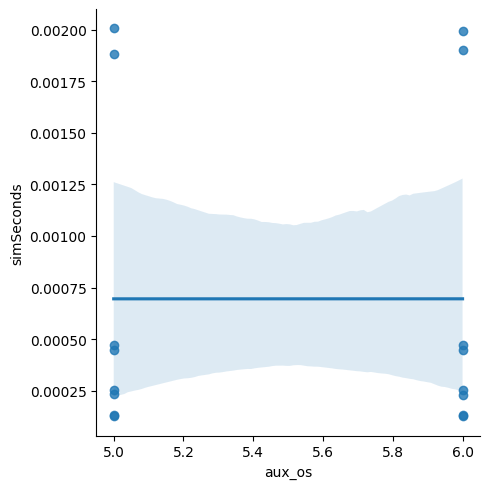

In [64]:
sns.lmplot(x='aux_os',y='simSeconds',data=is_256_4,fit_reg=True)

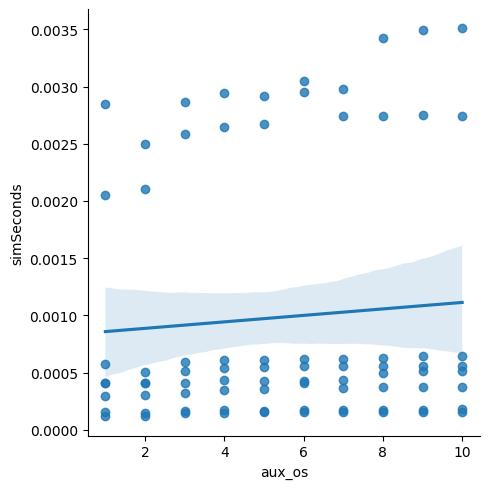

In [65]:
sns.lmplot(x='aux_os',y='simSeconds',data=is_256_5,fit_reg=True)

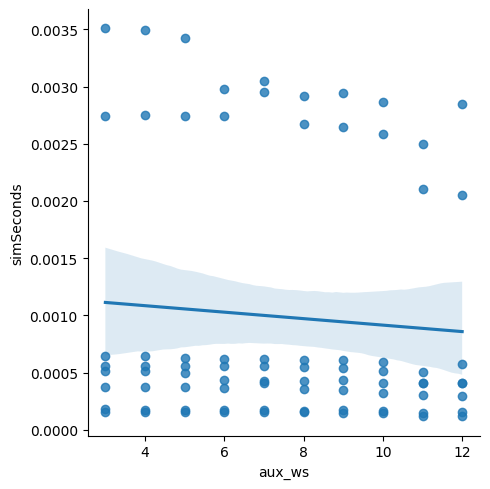

In [66]:
sns.lmplot(x='aux_ws',y='simSeconds',data=is_256_5,fit_reg=True)

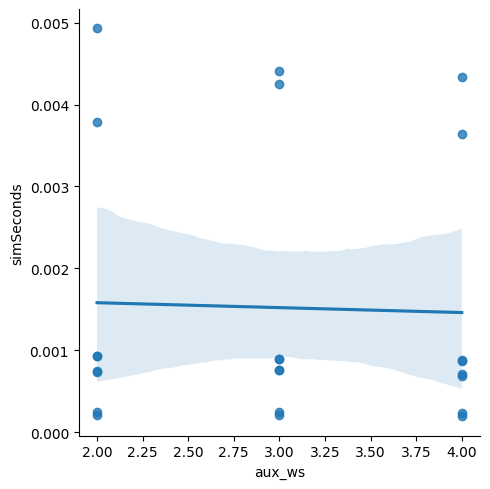

In [67]:
sns.lmplot(x='aux_ws',y='simSeconds',data=is_512_4,fit_reg=True)

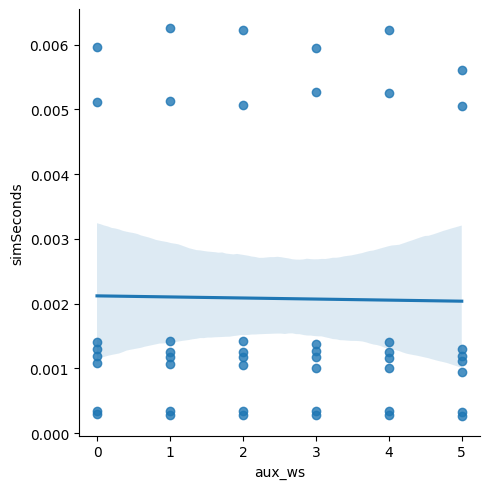

In [68]:
sns.lmplot(x='aux_ws',y='simSeconds',data=is_512_5,fit_reg=True)

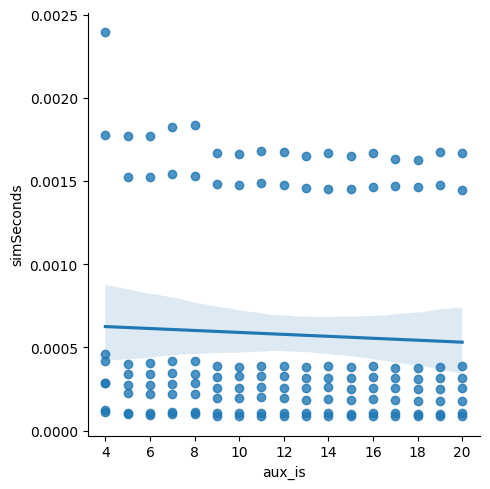

In [70]:
sns.lmplot(x='aux_is',y='simSeconds',data=os_128_5,fit_reg=True) 

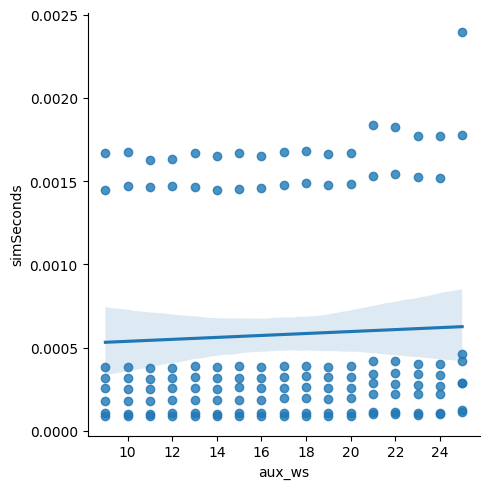

In [71]:
sns.lmplot(x='aux_ws',y='simSeconds',data=os_128_5,fit_reg=True) 

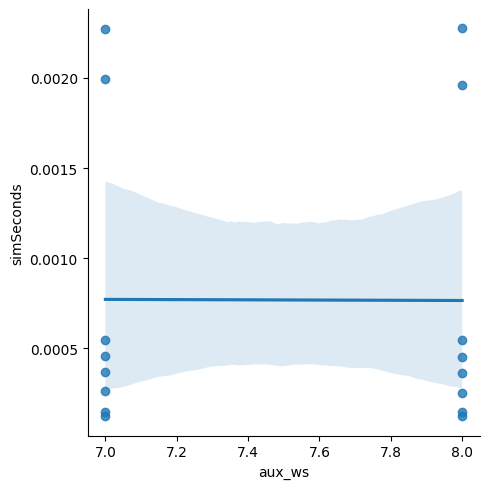

In [72]:
sns.lmplot(x='aux_ws',y='simSeconds',data=os_256_4,fit_reg=True) 

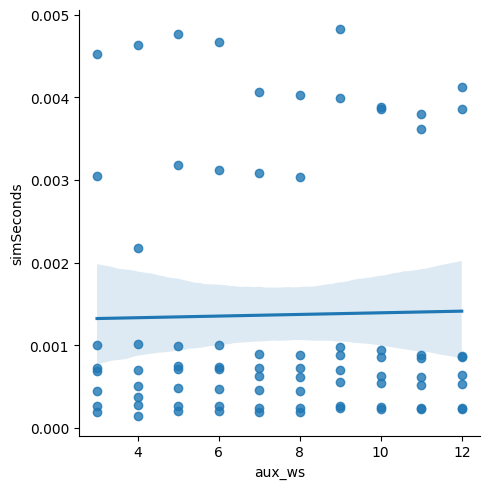

In [73]:
sns.lmplot(x='aux_ws',y='simSeconds',data=os_256_5,fit_reg=True) 

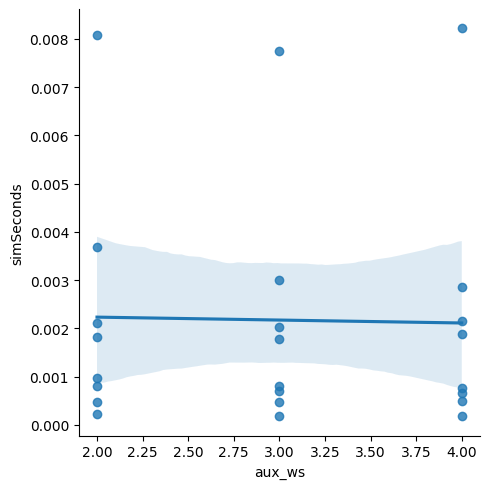

In [74]:
sns.lmplot(x='aux_ws',y='simSeconds',data=os_512_4,fit_reg=True) 

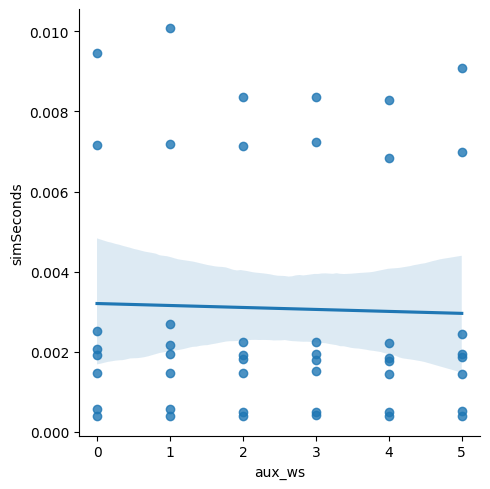

In [75]:
sns.lmplot(x='aux_ws',y='simSeconds',data=os_512_5,fit_reg=True) 

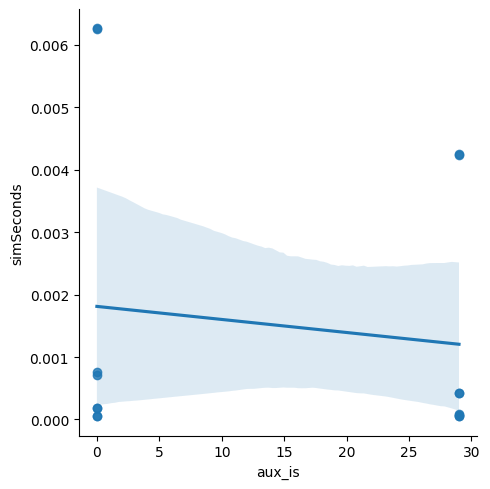

In [77]:
sns.lmplot(x='aux_is',y='simSeconds',data=ws_128_3,fit_reg=True) 

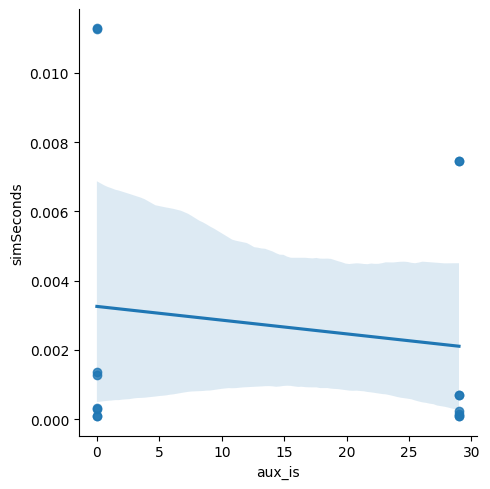

In [78]:
sns.lmplot(x='aux_is',y='simSeconds',data=ws_128_4,fit_reg=True) 

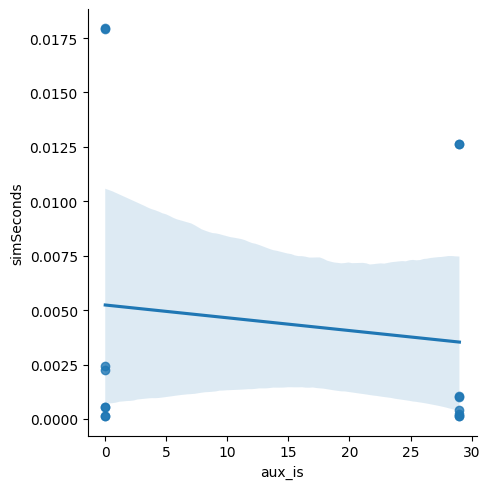

In [79]:
sns.lmplot(x='aux_is',y='simSeconds',data=ws_128_5,fit_reg=True) 

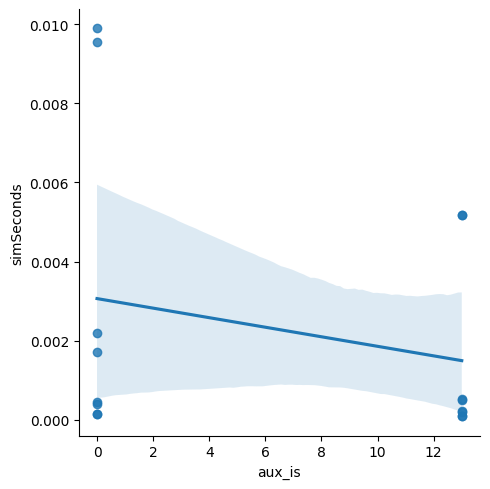

In [80]:
sns.lmplot(x='aux_is',y='simSeconds',data=ws_256_3,fit_reg=True) 

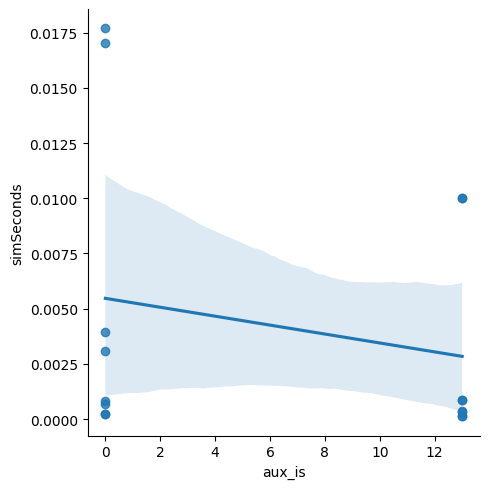

In [81]:
sns.lmplot(x='aux_is',y='simSeconds',data=ws_256_4,fit_reg=True) 

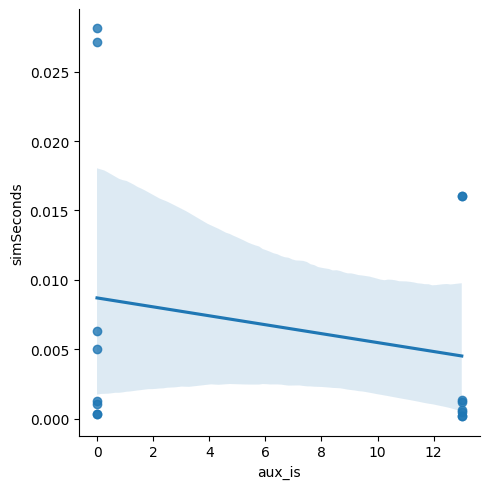

In [82]:
sns.lmplot(x='aux_is',y='simSeconds',data=ws_256_5,fit_reg=True) 